# Unit 7 Classwork

The purpose of this in-class notebook is for you to gain some experience with hypothesis testing.

## Problem 1 

Natural cork in wine bottles is subject to deterioration, and as a result wine in such bottles may experience contamination. 

The article “Effects of Bottle Closure Type on Consumer Perceptions of Wine Quality” (*Amer. J. of Enology and Viticulture, 2007: 182–191*) reported that, in a tasting of commercial chardonnays, $16$ of $91$ bottles were considered spoiled to some extent by cork-associated characteristics.

**Do these data provide strong evidence for concluding that more than $15\%$ of all such bottles are contaminated in this way?  Use a significance level $\alpha = 0.10$.**


- H0 : p = 0.15
- H1 : p > 0.15 (One-tailed test)

In [114]:
alpha = 0.10
z_critical = qnorm(1 - alpha) # for upper tail we should have the positive value so '1 - alpha'
z_critical


[1] 1.281552

In [115]:
p_hat = 16/91
p0 = 0.15
n = 91
z_stat = (p_hat - p0)/sqrt(p0*(1-p0)/n)
z_stat

[1] 0.6899094

Upper-tail test
- Therefore, since $z_{stat} < z_{critical}$, we fail to reject the null hypothesis.
- We have not found the strong evidence that the percentage of contaminated wine bottles is more than 15%.

## Problem #2

The goal of this problem is to learn about the distribution of $p$-values across many random samples from a normally distributed population. 

**2.(a) Consider the test $H_0: \mu = 0$ vs $H_1: \mu > 0$. Simulate $m = 10,000$ samples of size $n = 5$ under the null hypothesis. Fix $\sigma = 1$ and assume that it is known.**

In [116]:
# One tailed test
m = 10000
n = 5

x_null = t(replicate(m, rnorm(n, mean=0, sd=1)))

head(x_null)

1.1037808,1.6460173,0.5704913,-0.7922212,-0.1581547
-1.3189576,-1.7574148,0.0227758,-1.0039691,1.3850477
1.4978200,1.1421981,0.1717684,0.1232424,-0.6457725
-0.4486861,0.6120102,-0.6611583,-0.1746192,1.7803266
0.2361191,0.3774207,1.1863121,-1.3754823,-0.1068209
0.5597819,0.1705977,1.4244269,-0.4504553,0.2340892


**2.(b) Calculate the $p$-value for each sample (remember, the $p$-value is calculated assuming the null hypothesis is true). Print a histogram of these $p$-values. Comment on the distribution.**

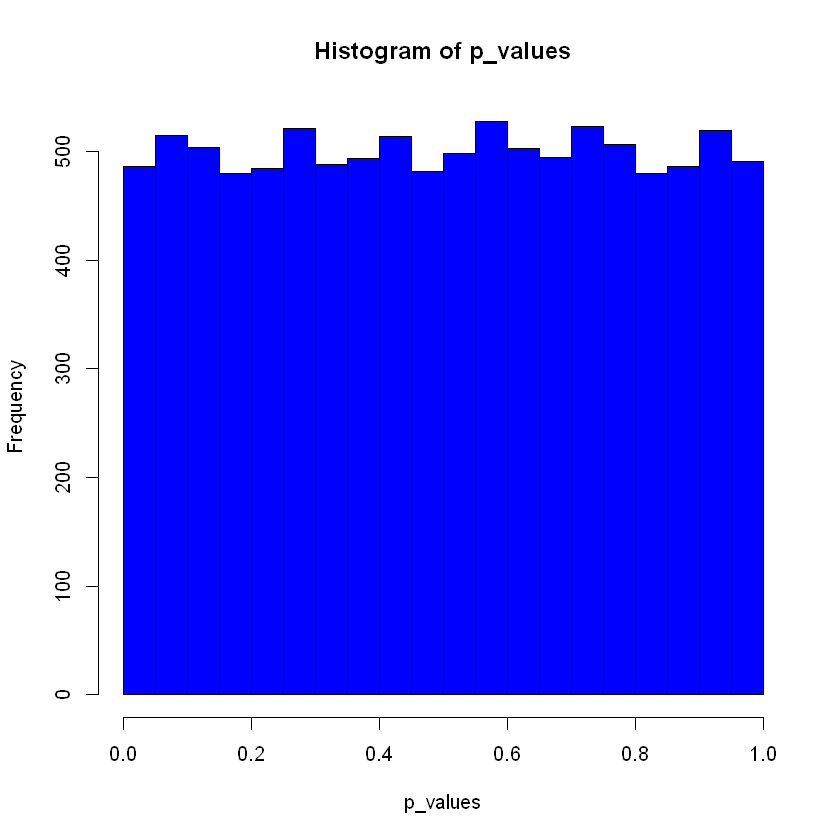

In [117]:
x_bars = rowMeans(x_null)
mu = 0
sigma = 1

z_stats = (x_bars - mu)/(sigma/sqrt(n))
p_values = 1 - pnorm(z_stats) # upper tailed test

hist(p_values,col = 'blue')


Uniform Distribution

**2.(c) Suppose $\alpha = 0.05$. What is the percentage of $p$-values that are less than $0.05$? How often, in this scenario, would you make a type I error? Does the answer which theory suggests match (roughly) the answer the simulation suggests?**

In [118]:
alpha = 0.05
prop_null = sum(p_values<0.05)/m
print(prop_null) * 100

[1] 0.0486


[1] 4.86

We would reject the null hypothesis for approximately 5.04% of the times but we know we shouldn't reject the null hypothesis because the null hypothesis is actually true and it will lead to make a Type I error roughly 5.04%.
For a significance level of $\alpha=0.05$, theory would suggest that we would make a Type I error 5% of the time. Our simulation supports that theoritical value.


**2.(d) Now, considering the same test, i.e.,  $H_0: \mu = 0$ vs. $H_1: \mu > 0$, simulate data under the specific alternative $\mu = 2$. Calculate the $p$-values for each sample (remember, the $p$-value is calculated assuming the null hypothesis is true). Print a histogram of these $p$-values. What does the distribution look like?**

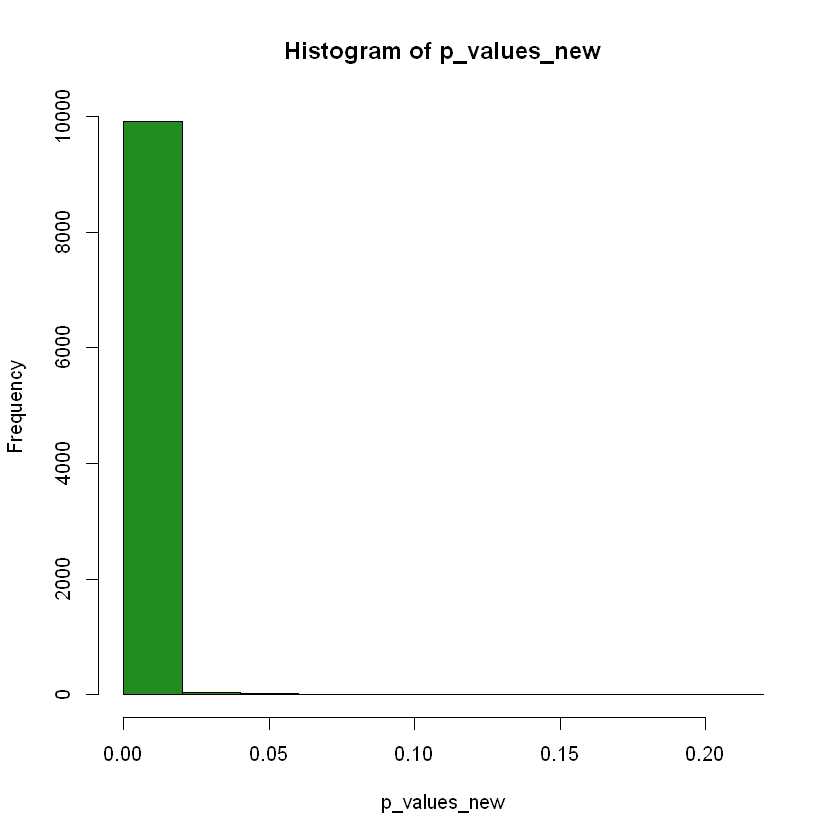

In [119]:
mu_alternative = 2
x_new = t(replicate(m, rnorm(n, mean = mu_alternative, sd = 1)))

x_bars_new = rowMeans(x_new)

# Here mu = 0,  because we assume the same that Null Hypothesis is true.
z_stats_new = (x_bars_new - 0)/(sigma/sqrt(n)) 
p_values_new  = 1 - pnorm(z_stats_new)
hist(p_values_new,col = 'forestgreen')

The distribution is Extremely skewed. Notice that the vast majority of time, our p-value is smaller than alpha. This indicated that we would reject the Null Hypothesis every time. This is a good outcome because our null hypothesis holds that the mean = 0, when we know that every sample of the 10000 comes from a normal distribution with men

**2.(e) Suppose $\alpha = 0.05$. What is the proportion of $p$-values that are greater than $0.05$? How often, in this scenario, would you make a type II error?**

In [120]:
type_II_errors = sum(p_values_new > 0.05)/m
type_II_errors

[1] 0.0027

**2.(f) The ${\bf power}$ of a test is $1 - P(\text{Type II Error})$. That is, the power of a hypothesis test is the probability of rejecting $H_0$ when $H_1$ is true. (High powered tests are desirable!) Calculate the power of this test.**

In [121]:
1 - type_II_errors

[1] 0.9973

**2.(g) How could you increase the power of the test? Verify your answer through simulation by changing values from above.**

In [122]:
n_1 = 10
mu_alternative = 2
x_new = t(replicate(m, rnorm(n_1, mean = mu_alternative, sd = 1)))

x_bars_new = rowMeans(x_new)

# Here mu = 0,  because we assume the same that Null Hypothesis is true.
sigma_new = 1
z_stats_new = (x_bars_new - 0)/(sigma_new/sqrt(n_1)) 
p_values_new  = 1 - pnorm(z_stats_new)
type_II_errors = sum(p_values_new > 0.05)/m

power_of_test = 1 - type_II_errors
print(power_of_test)

[1] 1


Increase the sample size.

## Problem #3



Analysis of a random sample consisting of $20$ specimens of cold-rolled steel to determine yield strengths resulted in a sample average strength of $29.8$ ksi. A second random sample of $25$ two-sided galvanized steel specimens gave a sample average strength of $34.7$ ksi.

Assuming that the two yield-strength distributions are normal with $\sigma_1 = 4.0$ and $\sigma_2 = 5.0$, does the data indicate that the corresponding true average yield strengths $\mu_1$ and $\mu_2$ are different? 

Conduct the test at significance level  $\alpha = 0.01$.

Note that $H_0: \, \mu_1 - \mu_2 = 0$, vs. $H_1: \, \mu_1 - \mu_2 \neq 0$. This is a two-tailed test.

In [123]:
n1 = 20
x_bar1 = 29.8
sigma1 = 4

n2= 25
x_bar2=34.7
sigma2 = 5

zstat = (x_bar1 - x_bar2 - 0)/sqrt(sigma1^2/n1 + sigma2^2/n2)
zstat
p = 2*(1-pnorm(abs(zstat)))
p

[1] -3.652244

[1] 0.0002599583

The 'p' value is very less than the significance level and also the greater than the zstat value so, We reject H0.